<a href="https://colab.research.google.com/github/luisedu96/TransmisionGuiada/blob/master/Actividades/Fibraoptica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sys
import math
import cmath
import matplotlib.pyplot as plt

In [2]:
Modulador_Chirp = "Directa"  #@param ['Directa', 'Chirp-zero', 'fixed-chirp']
if (Modulador_Chirp=='Directa'):
  Chirp=-3
elif (Modulador_Chirp=='Chirp-zero'):
  Chirp=0
elif (Modulador_Chirp=='fixed-chirp'):
  Chirp=0.7
print('Chirp:', Chirp)

Chirp: -3


##$T_z \leq \frac{T_b}{2}$
Entonces para máximizar $z \space (longitud\space de\space fibra\space estandar\space G652.D)$ se considera
##$T_z = \frac{T_b}{2}$
De la formula se despeja $z$
##$\frac{T_z}{T_0}=\sqrt{\left (1+\frac{C\beta_2z}{T_0^2} \right)^2+\left (\frac{\beta_2z}{T_0^2} \right)^2}$
##$K_0=\sqrt{\left (1+CK_1z \right)^2+\left (K_1z \right)^2}, K_0=\frac{T_z}{T_0}, K_1=\frac{\beta_2}{T_0^2}$
##$K_0^2=\left (1+CK_1z \right)^2+\left (K_1z \right)^2$
##$K_0^2=1+(CK_1z)^2+2CK_1z+ (K_1z)^2$
##$K_0^2=1+((CK_1)^2+K_1^2)z^2+2CK_1z$
##$0=(1-K_0^2)+((CK_1)^2+K_1^2)z^2+2CK_1z$
##$0=((CK_1)^2+K_1^2)z^2+2CK_1z+(1-K_0^2)$
Por fórmula general:
##$0=Az^2+Bz+C$
##$A=(CK_1)^2+K_1^2, B=2CK_1, C=1-K_0^2$
##$z=\frac{-B\pm\sqrt{B^2-4AC}}{2A}$


In [3]:
def formula(chirp,kp,km):
  A=(chirp*km)**2+km**2
  B=2*chirp*km
  C=1-kp**2
  DIS=B**2-4*A*C
  S1=(-B+cmath.sqrt((B**2)-(4*A*C)))/(2*A)
  S2=(-B-cmath.sqrt((B**2)-(4*A*C)))/(2*A)
  if (np.imag(S1)==0 and np.imag(S2)==0):
    if (np.real(S1)>0 and np.real(S2)>0): 
      if (np.real(S1)<np.real(S2)):z=S1
      else: z=S2
    elif (np.real(S1)>0 and np.real(S2)<0): z=S1
    elif (np.real(S2)>0 and np.real(S1)<0): z=S2
    else: z=0
  else: 
    #if (np.abs(S1)>np.abs(S2)): z=S2
    #else: 
    z='No aplica'

  return z

In [4]:
distancia=3287*1e3 #m
c=3*1e8 #m/s
ptx=28 #dBm
lamda=1550*1e-9 #m

#Amplificador
ptx_amp=28 #dBm
Sen=-18 #dBm.

#Fibra estandar
D_stand=(17*1e-12)/(1e-9*1e3) #s/m2
alphaS = 0.6/1e3 #dB/m
betha2S = (-1*D_stand*(lamda**2))/(2*np.pi*c)

#Fibra compensadora
D_comp = (-110*1e-12)/(1e-9*1e3) #s/m2.
alphaC = 0.35/1e3 #dB/m.
betha2C = (-1*D_comp*(lamda**2))/(2*np.pi*c)

bps=2.5*1e9 #bps
Tb=1/bps #s

ToS=(1/4)*Tb #s
TzS=Tb/2

ToC=TzS
TzC=ToS

koS=TzS/ToS
k1S=betha2S/(ToS**2)

koC=TzC/ToC
k1C=betha2C/(ToC**2)

zS=formula(Chirp,koS,k1S)
LDS=(ToS**2)/np.abs(betha2S)

zC=formula(Chirp,koC,k1C)
LDC=(ToC**2)/np.abs(betha2C)

print('Se escoge el Modulador Directo con Chirp -3, porque la tasa de bits es menor de 10Gbps y de menor costo.')
print('\n')
print('Máxima longitud de la fibra estándar por dispersión: {:.3f} Km'.format(np.real(zS)*1e-3))
print('Longitud de Dispersión fibra estándar(LD): {:.3f} Km'.format(LDS*1e-3))
print('\n')
if (np.imag(zC)==0):print('Longitud de la fibra compensadora: {:.3f} Km'.format(np.real(zC)*1e-3))
else: print('Longitud de la fibra compensadora: {}'.format(zC))
print('Longitud de Dispersión fibra compensadora(LD): {:.3f} Km'.format(LDC*1e-3))

print(betha2S,betha2C)

Se escoge el Modulador Directo con Chirp -3, porque la tasa de bits es menor de 10Gbps y de menor costo.


Máxima longitud de la fibra estándar por dispersión: 149.763 Km
Longitud de Dispersión fibra estándar(LD): 461.518 Km


Longitud de la fibra compensadora: 50.648 Km
Longitud de Dispersión fibra compensadora(LD): 285.302 Km
-2.166761921076912e-26 1.402022419520355e-25


##**Presupuesto de Potencia**
##$P_{tx}-\alpha_{estandar}\cdot l_{fibra\space estandar}-\alpha_{compensadora}\cdot l_{fibra\space compensadora}\leq P_{rx}$
##$28dBm-\alpha_{estandar}\cdot l_{fibra\space estandar}-\alpha_{compensadora}\cdot l_{fibra\space compensadora}\geq -18dBm$

In [5]:
Pb=(ptx)-alphaS*np.real(zS)-alphaC*np.real(zC)
print(Pb)
if (Pb<ptx_amp):
  print('No satisface por presupuesto de potencia {:.3f} dBm < -18dBm'.format(Pb))

-79.58447577753995
No satisface por presupuesto de potencia -79.584 dBm < -18dBm


##**Solución**

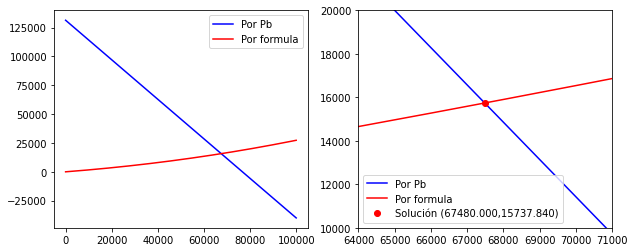

In [6]:
z1=np.arange(0,100e3,10)
z2=(460000-6*(z1))/3.5

Tzs=np.sqrt((1+(Chirp*betha2S*z1)/(ToS**2))**2+((betha2S*z1)/(ToS**2))**2)*ToS

Toc=Tzs
Tzc=ToS

koc=Tzc/Toc
k1c=betha2C/(Toc**2)
zsgraf=np.array([])
for m in range(len(koc)):
  zs=formula(Chirp,koc[m],k1c[m])
  zsgraf=np.append(zsgraf,np.real(zs))

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(z1, z2, label='Por Pb', color='blue')
ax[0].plot(z1, zsgraf, label='Por formula', color='red')
#ax[0].axis([70000, 90000, np.min(zsgraf), np.max(zsgraf)])
#ax[0].set_xlabel('distancia z [m]', fontsize=14)
#ax[0].set_ylabel('Ancho de pulso [s/bit]', fontsize=14)
#ax[0].set_title('Variación del ancho del pulso'+'\n'+'a lo largo de la fibra dispersiva', fontsize=14)
ax[0].legend()

ax[1].plot(z1, z2, label='Por Pb', color='blue')
ax[1].plot(z1, zsgraf, label='Por formula', color='red')
idx = np.argwhere(np.diff(np.sign(z2 - zsgraf))).flatten()
ax[1].plot(z1[idx], zsgraf[idx], 'ro',label='Solución ({:.3f},{:.3f})'.format(z1[idx][0],zsgraf[idx][0]))
ax[1].axis([64000, 71000, 10000, 20000])
#ax[1].set_xlabel('distancia z [m]', fontsize=14)
#ax[1].set_ylabel('Ancho de pulso [s/bit]', fontsize=14)
#ax[1].set_title('Variación del ancho del pulso'+'\n'+'a lo largo de la fibra compensadora', fontsize=14)
ax[1].legend()

fig.show()
#print(np.real(zs),z2)
#LDS=(ToS**2)/np.abs(betha2S)

##**Valores de longitud**

In [7]:
Zs=z1[idx][0]
Zc=zsgraf[idx][0]

tz1=np.sqrt((1+(Chirp*betha2S*Zs)/(ToS**2))**2+((betha2S*Zs)/(ToS**2))**2)*ToS
to2=tz1

print(round(Zs*1e-3,2),'Km de fibra estandar',round(Zc*1e-3,2),'Km de fibra compensadora')
Pb3=28-alphaS*Zs-alphaC*Zc
print('Presupuesto de potencia:')
print(round(Pb3,3),'dBm')
print('Ancho del pulso:')
print(tz1,' < ',TzS)

67.48 Km de fibra estandar 15.74 Km de fibra compensadora
Presupuesto de potencia:
-17.996 dBm
Ancho del pulso:
1.4460502261145937e-10  <  2e-10


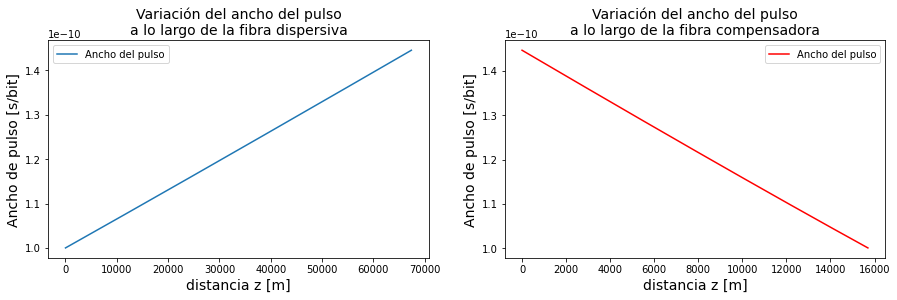

In [8]:
lS = np.real(Zs)#
lC = np.real(Zc)#

zS_disp = np.arange(0,lS,100)
zC_disp = np.arange(0,lC,100)

T_zS=np.sqrt((1+(Chirp*betha2S*zS_disp)/(ToS**2))**2+((betha2S*zS_disp)/(ToS**2))**2)*ToS
T_zC=np.sqrt((1+(Chirp*betha2C*zC_disp)/(to2**2))**2+((betha2C*zC_disp)/(to2**2))**2)*to2

fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].plot(zS_disp, T_zS, label='Ancho del pulso')
#ax[0].axis([0, z_disp[-1], 0, T_zS[-1]])
ax[0].set_xlabel('distancia z [m]', fontsize=14)
ax[0].set_ylabel('Ancho de pulso [s/bit]', fontsize=14)
ax[0].set_title('Variación del ancho del pulso'+'\n'+'a lo largo de la fibra dispersiva', fontsize=14)
ax[0].legend()

ax[1].plot(zC_disp, T_zC, label='Ancho del pulso',color='r')
#ax[1].axis([0, z_disp[-1], 0, T_zC[-1]])
ax[1].set_xlabel('distancia z [m]', fontsize=14)
ax[1].set_ylabel('Ancho de pulso [s/bit]', fontsize=14)
ax[1].set_title('Variación del ancho del pulso'+'\n'+'a lo largo de la fibra compensadora', fontsize=14)
ax[1].legend()

fig.show()

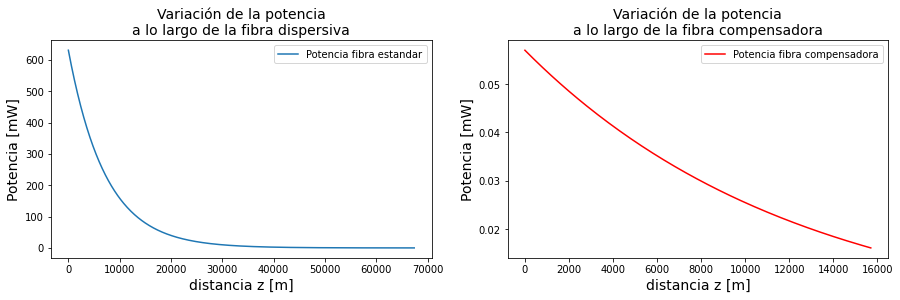

In [9]:
lS = np.real(Zs)#
lC = np.real(Zc)#

zS_disp = np.arange(0,lS,100)
zC_disp = np.arange(0,lC,100)

pot_S=ptx-alphaS*zS_disp
pot_C=pot_S[-1]-alphaC*zC_disp

pot_Sw= 10**(pot_S/10)
pot_Cw= 10**(pot_C/10)

fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].plot(zS_disp, pot_Sw, label='Potencia fibra estandar')
#ax[0].axis([0, z_disp[-1], 0, T_zS[-1]])
ax[0].set_xlabel('distancia z [m]', fontsize=14)
ax[0].set_ylabel('Potencia [mW]', fontsize=14)
ax[0].set_title('Variación de la potencia'+'\n'+'a lo largo de la fibra dispersiva', fontsize=14)
ax[0].legend()

ax[1].plot(zC_disp, pot_Cw, label='Potencia fibra compensadora',color='r')
#ax[1].axis([0, z_disp[-1], 0, T_zC[-1]])
ax[1].set_xlabel('distancia z [m]', fontsize=14)
ax[1].set_ylabel('Potencia [mW]', fontsize=14)
ax[1].set_title('Variación de la potencia'+'\n'+'a lo largo de la fibra compensadora', fontsize=14)
ax[1].legend()

fig.show()

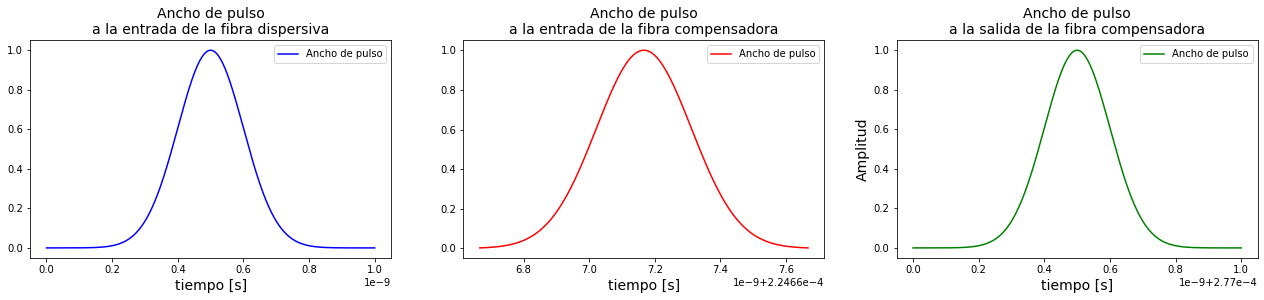

In [15]:
j=complex(0,1)
t1=np.arange(0,10e-10,1e-16)
tiempo1=zS_disp[-1]/3e8
tiempo2=zC_disp[-1]/3e8
t2=t1+tiempo1 #np.arange(tiempo1,tiempo1+10e-10,1e-16)
t3=tiempo1+tiempo2+t1 #np.arange(tiempo1+tiempo2,tiempo1+tiempo2+10e-10,1e-16)
chirpz=Chirp+((1+Chirp**2)*(betha2S*zS_disp[-1]))/(ToS**2)
chirpz2=chirpz+((1+chirpz**2)*(betha2C*zC_disp[-1]))/(tz1**2)
pulso=np.abs(np.exp(-0.5*(1+j*Chirp)*(((t1-5e-10)/ToS)**2)))
pulso2=np.abs(np.exp(-0.5*(1+j*chirpz)*(((t2-tiempo1-5e-10)/tz1)**2)))
pulso3=np.abs(np.exp(-0.5*(1+j*chirpz2)*(((t3-tiempo1-tiempo2-5e-10)/ToS)**2)))

fig, ax = plt.subplots(1, 3, figsize=(22, 4))
ax[0].plot(t1, pulso, label='Ancho de pulso',color='b')
#ax[0].axis([0, z_disp[-1], 0, T_zS[-1]])
ax[0].set_xlabel('tiempo [s]', fontsize=14)
#ax[0].set_ylabel('Potencia [dBm]', fontsize=14)
ax[0].set_title('Ancho de pulso'+'\n'+'a la entrada de la fibra dispersiva', fontsize=14)
ax[0].legend()

ax[1].plot(t2, pulso2, label='Ancho de pulso',color='r')
#ax[1].axis([0, z_disp[-1], 0, T_zC[-1]])
ax[1].set_xlabel('tiempo [s]', fontsize=14)
#ax[1].set_ylabel('Potencia [dBm]', fontsize=14)
ax[1].set_title('Ancho de pulso'+'\n'+'a la entrada de la fibra compensadora', fontsize=14)
ax[1].legend()

ax[2].plot(t3, pulso3, label='Ancho de pulso',color='g')
#ax[2].axis([0, z_disp[-1], 0, T_zC[-1]])
ax[2].set_xlabel('tiempo [s]', fontsize=14)
ax[2].set_ylabel('Amplitud', fontsize=14)
ax[2].set_title('Ancho de pulso'+'\n'+'a la salida de la fibra compensadora', fontsize=14)
ax[2].legend()

fig.show()